In [ ]:
%env JAVA_HOME=/Library/Java/JavaVirtualMachines/jdk1.8.0_321.jdk/Contents/Home

## CSCI 316 Group Project Assignment 2

| UOW ID      | Name                | Email                  |
| ----------- | ------------------- | ---------------------- |
| 6736622     | Adriel Tan          | esat859@uowmail.edu.au |
| 6738230     | Sulabh Mehta        | sm323@uowmail.edu.au   |
| 6738588     | Hizkia Felix Winata | hfw778@uowmail.edu.au  |

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
!spark-submit --version

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 3.2.0
      /_/
                        
Using Scala version 2.12.15, OpenJDK 64-Bit Server VM, 11.0.15
Branch HEAD
Compiled by user ubuntu on 2021-10-06T13:20:32Z
Revision 5d45a415f3a29898d92380380cfd82bfc7f579ea
Url https://github.com/apache/spark
Type --help for more information.


### Importing Data

First, we'll import the data into a Panda's DataFrame (DF) to visualise and understand the data set.

In [3]:
columns_name = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points", "Wilderness_Area_1", "Wilderness_Area_2",
    "Wilderness_Area_3", "Wilderness_Area_4", "Soil_Type_1", 
    "Soil_Type_2", "Soil_Type_3", "Soil_Type_4", "Soil_Type_5", 
    "Soil_Type_6", "Soil_Type_7", "Soil_Type_8", "Soil_Type_9", "Soil_Type_10", 
    "Soil_Type_11", "Soil_Type_12", "Soil_Type_13", "Soil_Type_14", "Soil_Type_15", 
    "Soil_Type_16", "Soil_Type_17", "Soil_Type_18", "Soil_Type_19", "Soil_Type_20", 
    "Soil_Type_21", "Soil_Type_22", "Soil_Type_23", "Soil_Type_24", "Soil_Type_25", 
    "Soil_Type_26", "Soil_Type_27", "Soil_Type_28", "Soil_Type_29", "Soil_Type_30", 
    "Soil_Type_31", "Soil_Type_32", "Soil_Type_33", "Soil_Type_34", "Soil_Type_35", 
    "Soil_Type_36", "Soil_Type_37", "Soil_Type_38", "Soil_Type_39", 
    "Soil_Type_40", "Cover_Type"
]

df_orig = pd.read_csv("covtype.data", header=None, names=columns_name)
df_orig

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [4]:
df_orig.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [5]:
with pd.option_context('display.max_columns', 60):
    print(df_orig.describe())

           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       3

In [6]:
print('Skewness of all the features: ')
skewness = df_orig.skew().sort_values()
print(skewness)

Skewness of all the features: 
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Elevation                              -0.817596
Hillshade_3pm                          -0.277053
Wilderness_Area_1                       0.205618
Wilderness_Area_3                       0.257822
Aspect                                  0.402628
Horizontal_Distance_To_Roadways         0.713679
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Horizontal_Distance_To_Fire_Points      1.288644
Soil_Type_29                            1.512910
Vertical_Distance_To_Hydrology          1.790250
Cover_Type                              2.276574
Soil_Type_23                            2.677848
Soil_Type_32                            2.856975
Soil_Type_33                            3.154625
Wilderness_Area_4                       3.575561
Soil_Type_22                            3.804032
Soil_Type_10                          

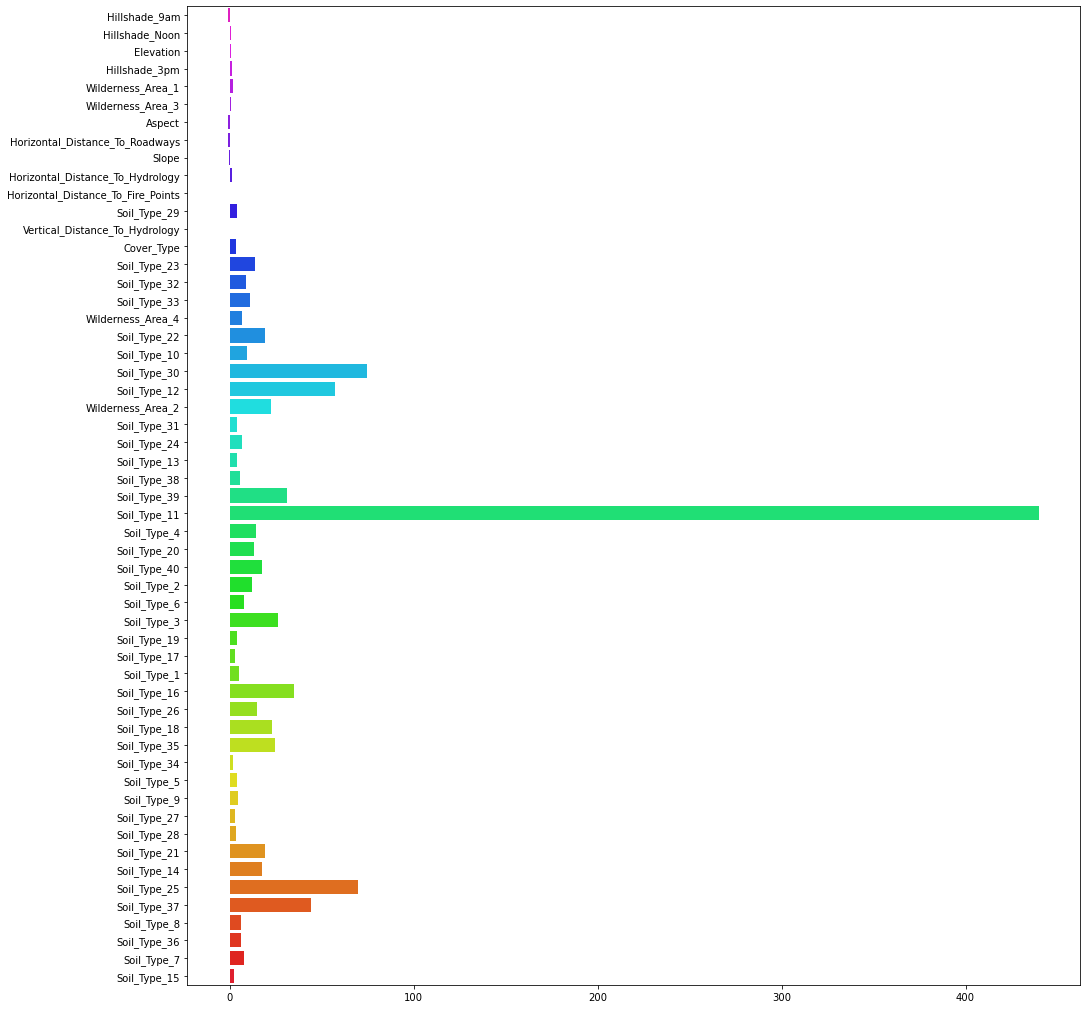

In [7]:
# set up the figure size 
plt.figure(figsize=(16,18))

# plot out the diagram to have a clear view of the skewness
sns.barplot(x=df_orig.skew(), y=skewness.index, palette = 'gist_rainbow_r')

# show the plot
plt.show()

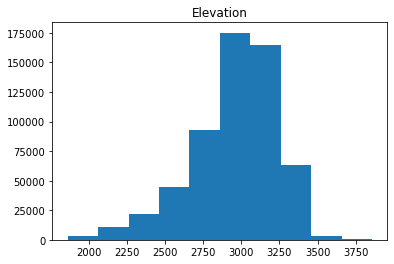

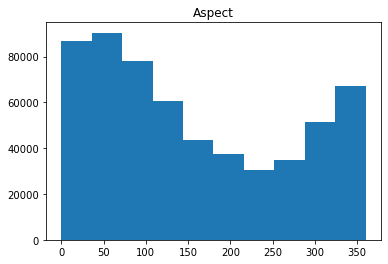

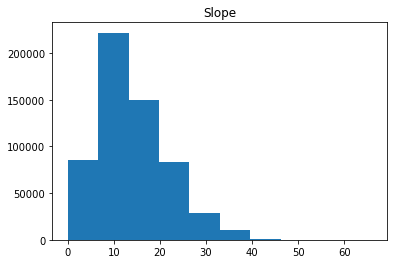

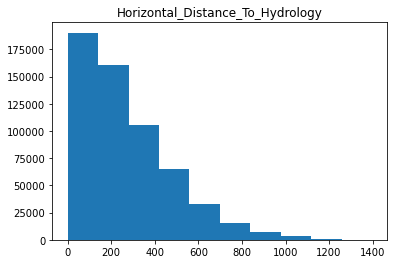

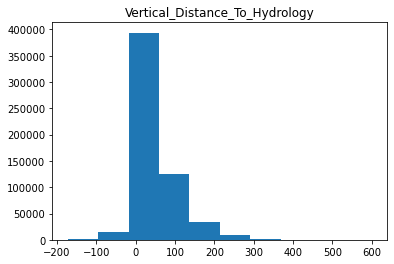

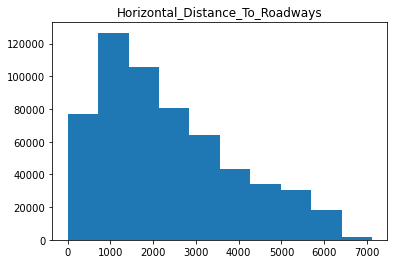

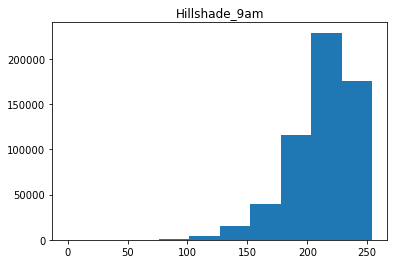

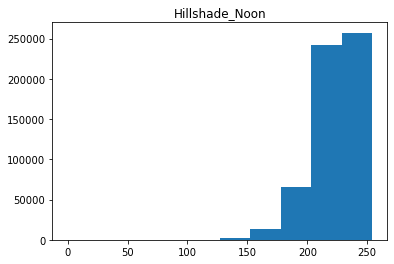

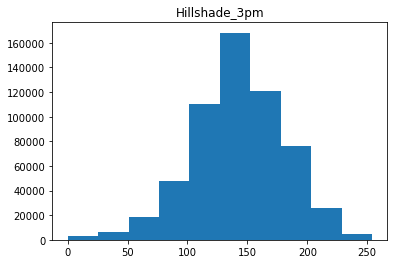

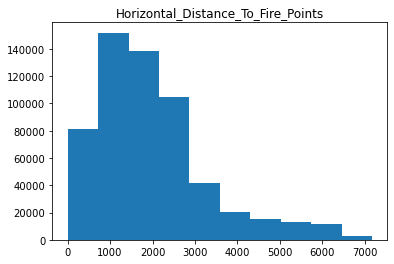

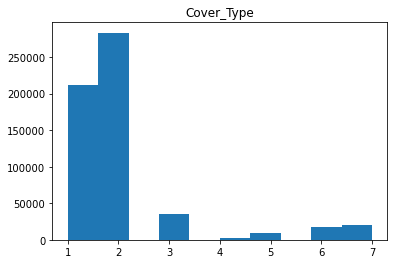

In [8]:
nonBinaryColNames = [word for word in df_orig.columns if ("Soil_Type" not in word and "Wilderness_Area" not in word)]

for col in nonBinaryColNames:
    plt.title(col)
    plt.hist(df_orig[col])
    plt.show()

In [9]:
valueCounts = df_orig["Cover_Type"].value_counts()
valueCounts

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

Based on the `describe()`, `skew()`, plots, and the original data set description, we can contrive the following information:

- There are no N.A. Values
- Soil Type, WIlderness_Area is binary (0,1)
  - We can see the distribution of it later and how it correlates to the result later
  - Skewness for binary values can be ignored, however, we should take into consideration the occurances of each binary attribute
- There are a mix of unimodel (hillshade_3pm), bimodal (aspect) distributions, left skewed (Hillshade_noon, hillshade_9am), but the rest are generally right skewed. 
  - Right skewed distributions might perform better if it was log transformed in our models.
- There is a unequal distribution of the class.
  - This may be an issue when we train our models and require us to balance the DS before training.

First, let's see if there are any attributes that correlate to the class "Cover Type".

In [10]:
corr = df_orig.corr()['Cover_Type']
corr.abs().sort_values(ascending=False).head(21)

Cover_Type                            1.000000
Wilderness_Area_4                     0.323200
Elevation                             0.269554
Soil_Type_10                          0.243876
Wilderness_Area_1                     0.203913
Soil_Type_38                          0.160170
Soil_Type_39                          0.155668
Horizontal_Distance_To_Roadways       0.153450
Slope                                 0.148285
Soil_Type_22                          0.141746
Soil_Type_23                          0.135055
Soil_Type_40                          0.128351
Soil_Type_29                          0.124933
Soil_Type_2                           0.118135
Soil_Type_6                           0.112958
Horizontal_Distance_To_Fire_Points    0.108936
Soil_Type_4                           0.099672
Hillshade_Noon                        0.096426
Soil_Type_1                           0.090828
Soil_Type_17                          0.090582
Vertical_Distance_To_Hydrology        0.081664
Name: Cover_T

In [11]:
df_orig["Soil_Type_11"].value_counts()

0    568602
1     12410
Name: Soil_Type_11, dtype: int64

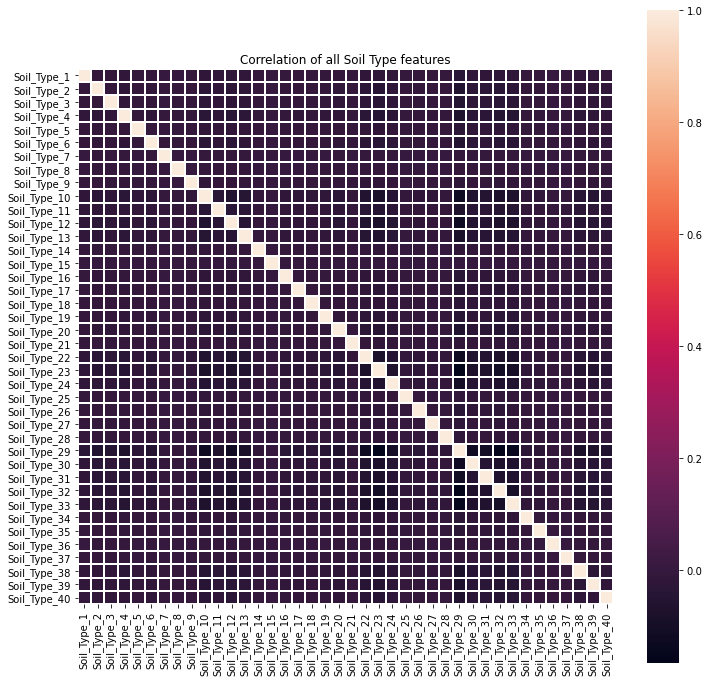

In [12]:
# get and store all the Soil Type features
columns = [cols for cols in df_orig.columns if str(cols).startswith('Soil')]

# set the figure size
plt.figure(figsize=(12, 12))

# using heapmap to plot
sns.heatmap(df_orig[columns].corr(), square=True, linewidths=1)

# set the title of the plot
plt.title('Correlation of all Soil Type features')

# show the plot
plt.show()

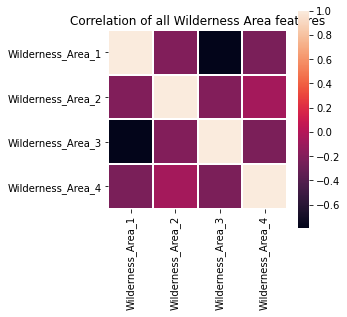

In [13]:
# get and store all the Soil Type features
columns = [cols for cols in df_orig.columns if str(cols).startswith('Wilderness')]

# set the figure size
plt.figure(figsize=(4, 4))

# using heapmap to plot
sns.heatmap(df_orig[columns].corr(), square=True, linewidths=1)

# set the title of the plot
plt.title('Correlation of all Wilderness Area features')

# show the plot
plt.show()

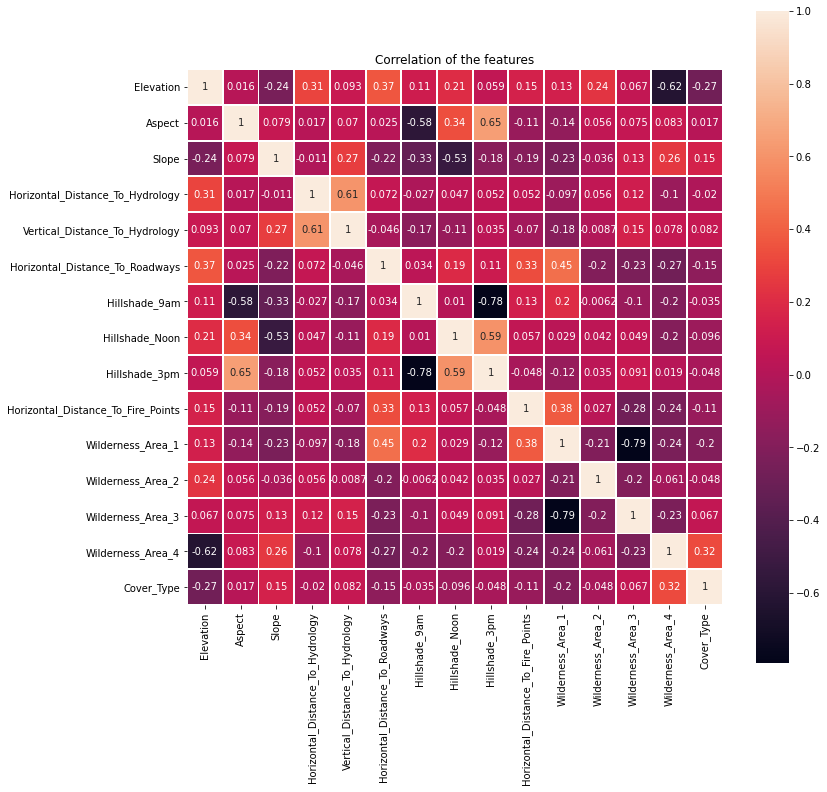

In [14]:
# get and store all the not Soil Type features
columns = [cols for cols in df_orig.columns if not str(cols).startswith('Soil')]

# set the figure size
plt.figure(figsize=(12, 12))

# using heapmap to plot
sns.heatmap(df_orig[columns].corr(), square=True, linewidths=1, annot = True)

# set the title of the plot
plt.title('Correlation of the features')

# show the plot
plt.show()

From the charts above, we can note the following
- Soil Type features are not correlated to each other at all 
- Wilderness area features can sometimes be correlated to each other
- We have a list of attibutes that are highly correlated to each other. 

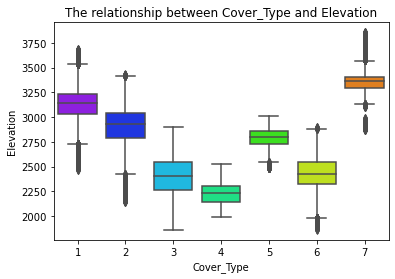

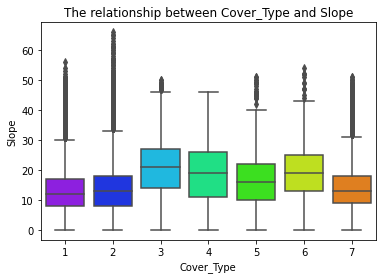

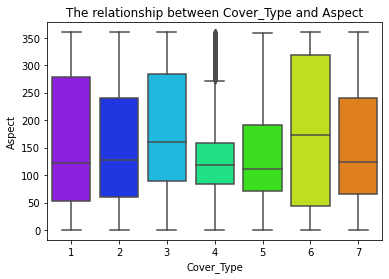

In [15]:
# Visualize the relationship between cover_type and elevation
plt.title('The relationship between Cover_Type and Elevation')
sns.boxplot(data=df_orig, x='Cover_Type', y='Elevation', palette='gist_rainbow_r')

plt.show()

plt.title('The relationship between Cover_Type and Slope')
sns.boxplot(data=df_orig, x='Cover_Type', y='Slope', palette='gist_rainbow_r')

plt.show()

plt.title('The relationship between Cover_Type and Aspect')
sns.boxplot(data=df_orig, x='Cover_Type', y='Aspect', palette='gist_rainbow_r')

plt.show()

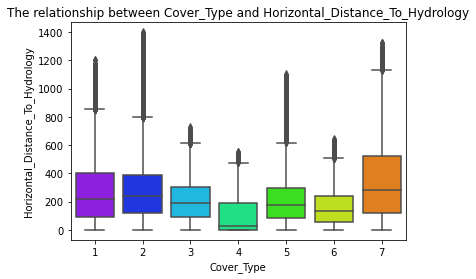

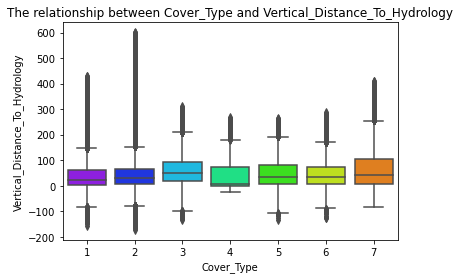

In [16]:
plt.title('The relationship between Cover_Type and Horizontal_Distance_To_Hydrology')
sns.boxplot(data=df_orig, x='Cover_Type', y='Horizontal_Distance_To_Hydrology', palette='gist_rainbow_r')

plt.show()

plt.title('The relationship between Cover_Type and Vertical_Distance_To_Hydrology')
sns.boxplot(data=df_orig, x='Cover_Type', y='Vertical_Distance_To_Hydrology', palette='gist_rainbow_r')

plt.show()

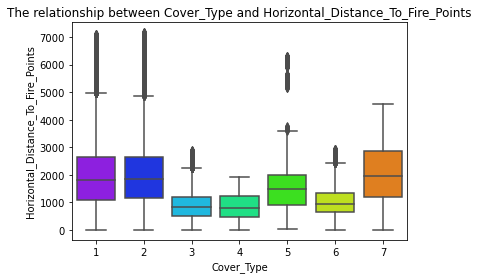

In [17]:
# Visualize the relationship between cover_type and elevation
plt.title('The relationship between Cover_Type and Horizontal_Distance_To_Fire_Points')
sns.boxplot(data=df_orig, x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', palette='gist_rainbow_r')

plt.show()

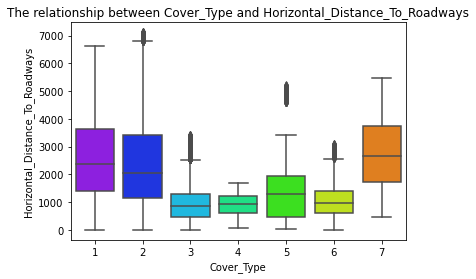

In [18]:
plt.title('The relationship between Cover_Type and Horizontal_Distance_To_Roadways')
sns.boxplot(data=df_orig, x='Cover_Type', y='Horizontal_Distance_To_Roadways', palette='gist_rainbow_r')

plt.show()

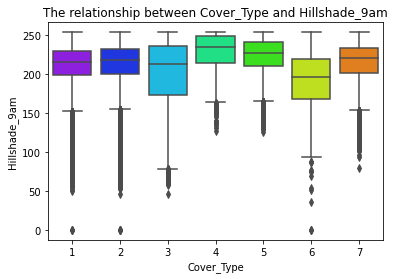

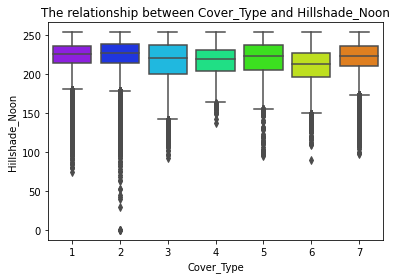

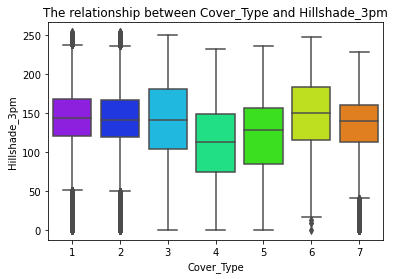

In [19]:
# Hillshade plots

df_orig["Hillshade_3pm"].describe()

plt.title('The relationship between Cover_Type and Hillshade_9am')
sns.boxplot(data=df_orig, x='Cover_Type', y='Hillshade_9am', palette='gist_rainbow_r')
plt.show()

plt.title('The relationship between Cover_Type and Hillshade_Noon')
sns.boxplot(data=df_orig, x='Cover_Type', y='Hillshade_Noon', palette='gist_rainbow_r')
plt.show()

plt.title('The relationship between Cover_Type and Hillshade_3pm')
sns.boxplot(data=df_orig, x='Cover_Type', y='Hillshade_3pm', palette='gist_rainbow_r')
plt.show()

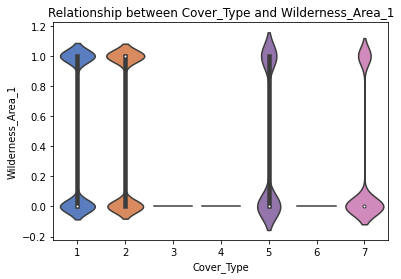

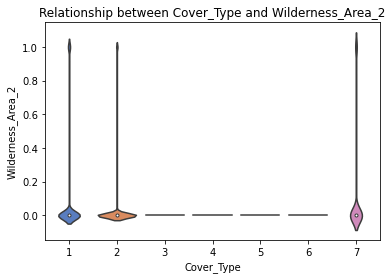

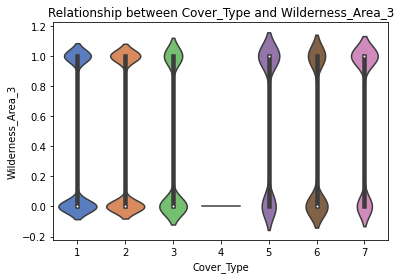

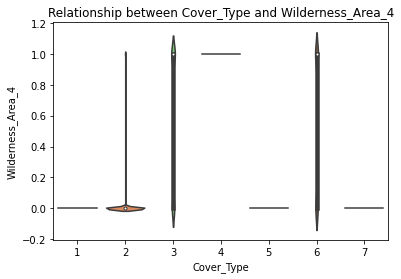

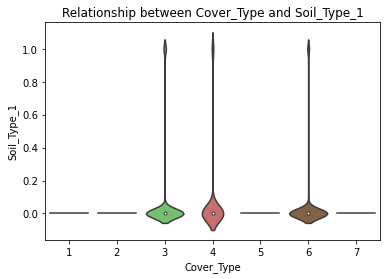

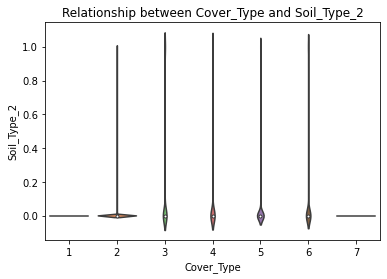

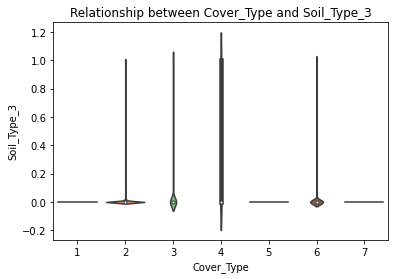

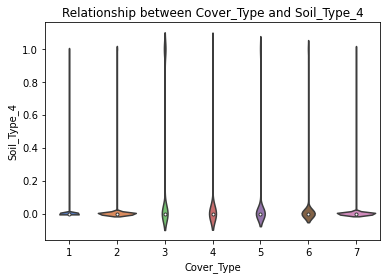

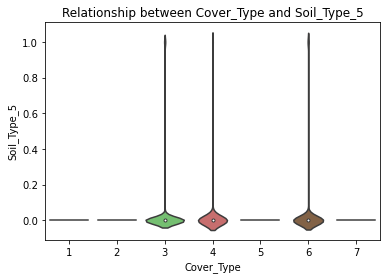

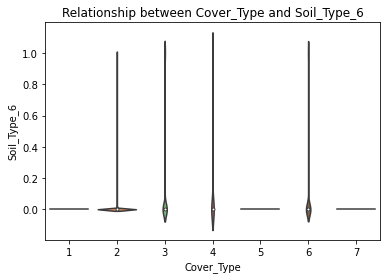

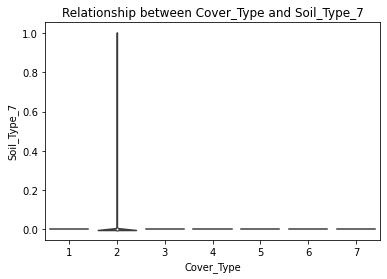

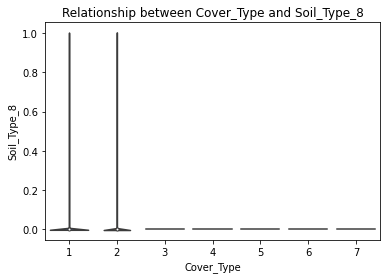

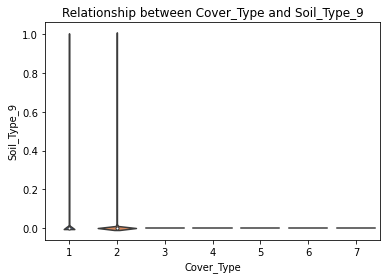

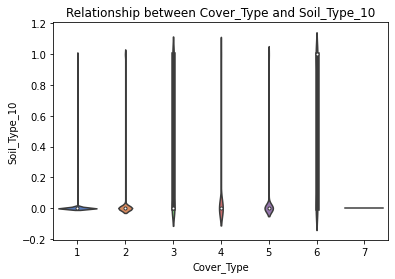

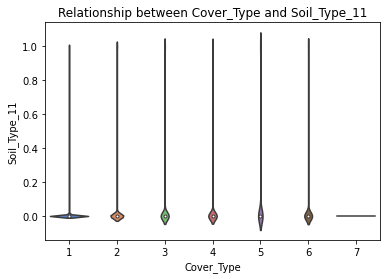

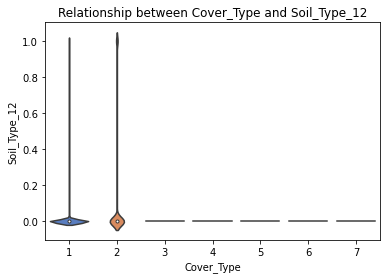

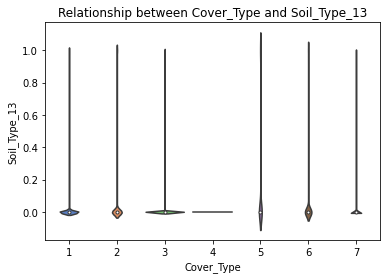

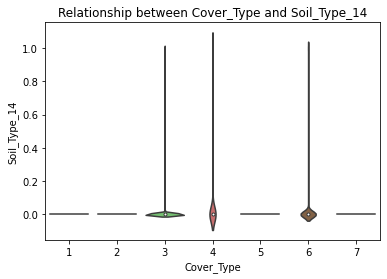

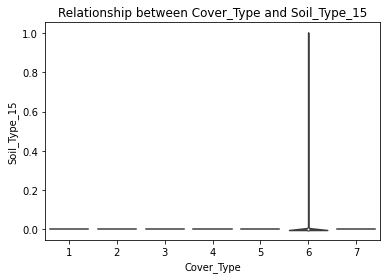

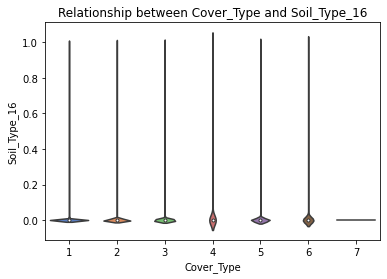

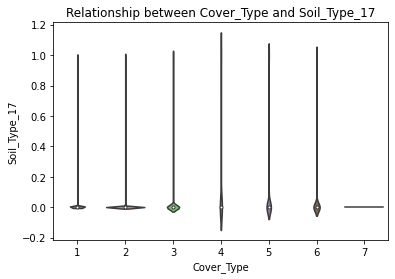

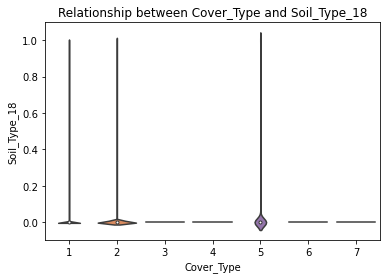

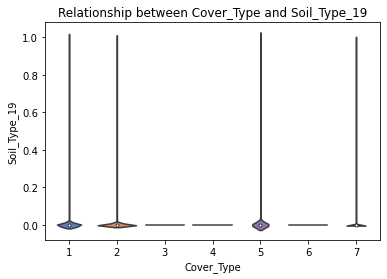

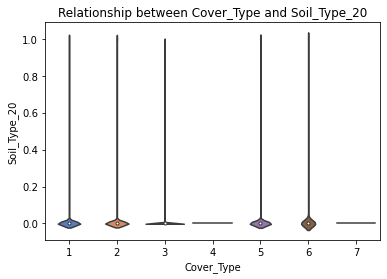

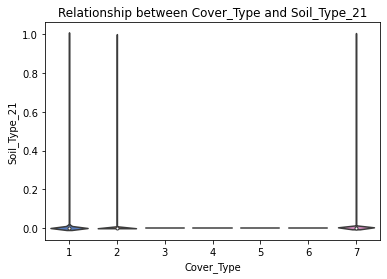

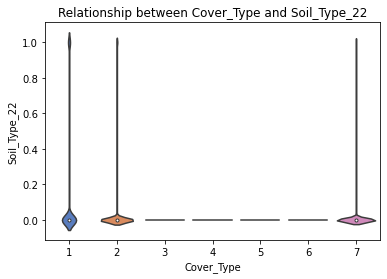

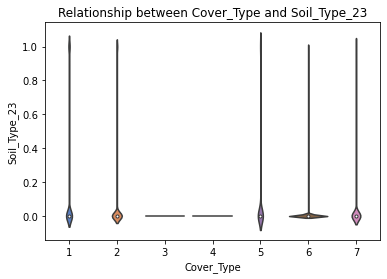

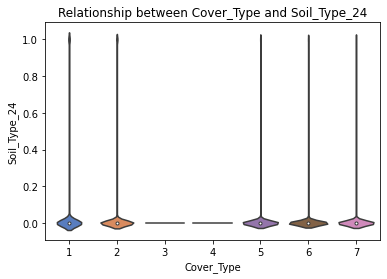

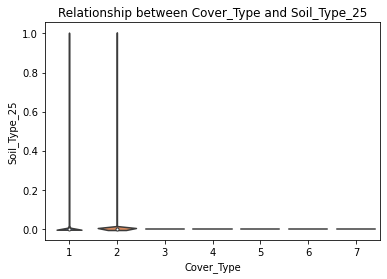

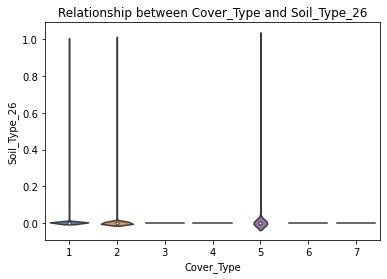

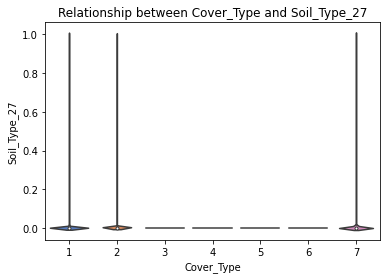

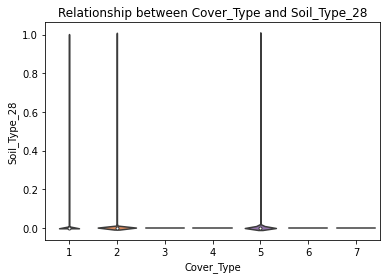

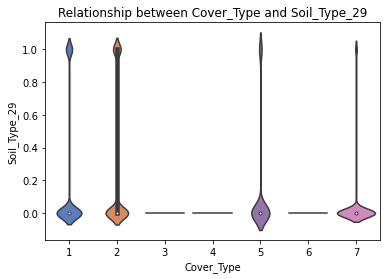

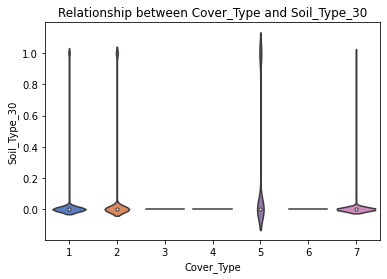

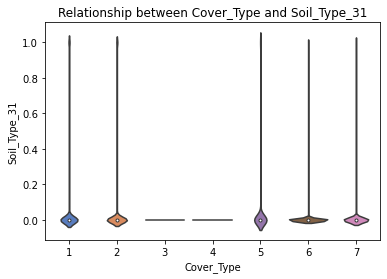

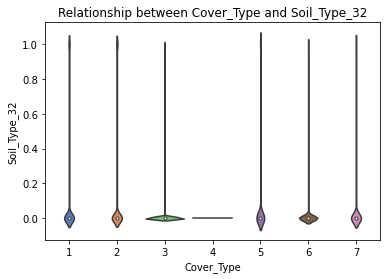

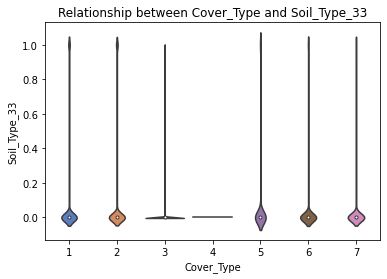

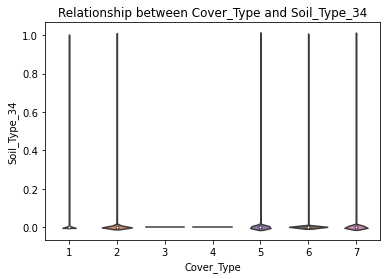

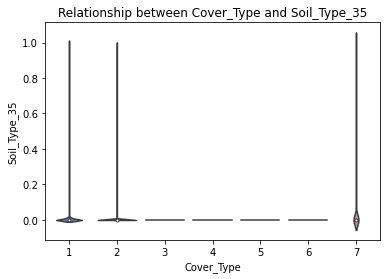

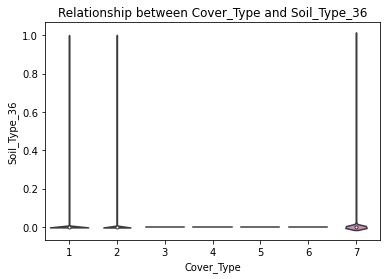

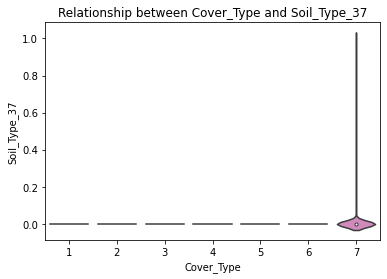

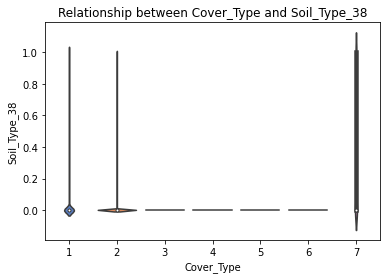

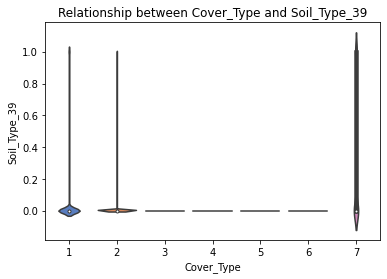

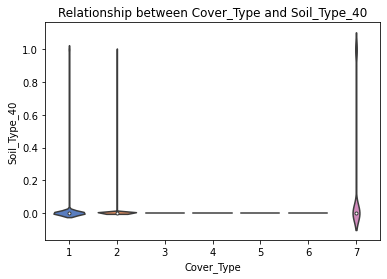

In [20]:
columns = [cols for cols in df_orig.columns if (str(cols).startswith('Soil') or str(cols).startswith('Wilderness'))]

for col in columns:
    sns.violinplot(data=df_orig, x="Cover_Type", y=col, palette="muted")
    
    # set the title for each of the graphes
    plt.title(f'Relationship between Cover_Type and {col}')
    plt.show()

In [21]:
df_orig[df_orig["Soil_Type_38"] == 1]["Cover_Type"].value_counts()

1    8729
7    6104
2     740
Name: Cover_Type, dtype: int64

In [22]:
print('test')

test


## Visualisation Findings:

- Some attributes like elevation and cover type are pretty distinct, with each class having distinct Q1-Q3 ranges from each other. Others like Horizontal_Distance_To_Roadways have distinct Q1 to Q3 ranges, but the classes share them. However, the rest overlap a lot.
- Most attributes have outliers
- Some soil types are distinctly only for specific covers. For example, Soil_Type_12 only has 1,2 class type classifications, Soil_Type_15 only has class 6.

## User-Defined Transform

We will insert a transformer 

1. We generate a new feature called 'Elevation_Level' since the feature 'Elevation' contains many different values and do not have a specific range for the models to do prediction.
2. The new feature 'Elevation_Level' has categorize the Elevation values into 3 catrgories which has 0, 1, and 2 so that we can based on this new feature to see the elevation each Cover Type belong to low, median or high. But in our case, we use number instead of string to label the category.

In [45]:
from sklearn.base import TransformerMixin, BaseEstimator


class Rebinner(BaseEstimator, TransformerMixin):
    # initalize
    def __init__(self, nbins):
        self._nbins = nbins

    def fit(self, X, y=None):
        self._min = X.min()
        self._max = X.max()
        self._range = self._max - self._min
        self._binsize = self._range / self._nbins
        return self

    def transform(self, X, y=None):
        return X.apply(lambda n: (n - self._min) // self._binsize)
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X, y)

In [49]:
df_binned = df_orig.copy()
df_binned["Elevation_Level"] = Rebinner(3).fit_transform(df_orig["Elevation"])
df_binned["Elevation_Level"].unique()

array([1., 0., 2.])

# ML

The default normalizer in pyspark does normalization on a row by row basis, not col by col
https://george-jen.gitbook.io/data-science-and-apache-spark/normalizer

So if we want z-score we have to implement our own like so:
https://stackoverflow.com/questions/32331848/create-a-custom-transformer-in-pyspark-ml

Or we can use min max:
https://stackoverflow.com/questions/40337744/scalenormalise-a-column-in-spark-dataframe-pyspark

In [23]:
columnsUsed = [
    "Elevation",
    "Aspect",
    "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am",
    "Hillshade_Noon",
    "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points",
]

In [24]:
columnsUsed

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']

In [25]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer, VectorAssembler, RFormula, MinMaxScaler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession

spark = SparkSession\
    .builder\
    .config("spark.driver.memory", "8g")\
    .appName("stuffs")\
    .getOrCreate()

In [26]:
from sklearn.model_selection import train_test_split

seed = 12

statifiedDataTrain, statifiedDataTest = train_test_split(
    df_orig, test_size=0.333, train_size=0.667, shuffle=True, stratify=df_orig["Cover_Type"]
)

classesBalanced = list()

minNumber = list(statifiedDataTrain["Cover_Type"].value_counts().sort_values())[0]

for x in list(statifiedDataTrain["Cover_Type"].unique()):
    classesBalanced.append(
        statifiedDataTrain[statifiedDataTrain["Cover_Type"] == x].sample(
            minNumber, random_state=seed
        )
    )

balancedTrainDF = pd.concat(classesBalanced)
balancedTrainDF = balancedTrainDF.sample(frac=1, random_state=seed)

In [27]:
# Load and parse the data file, converting it to a DataFrame.
trainData = spark.createDataFrame(balancedTrainDF)
testData = spark.createDataFrame(statifiedDataTest)

In [28]:
# Normaliser Here
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

unlist = udf(lambda x: round(float(list(x)[0]), 3), DoubleType())

fits = {}

for colName in columnsUsed:
    try:
        assembler = VectorAssembler(inputCols=[colName], outputCol=colName + "_Vect")

        scaler = MinMaxScaler(inputCol=colName + "_Vect", outputCol=colName + "_Scaled")

        pipeline = Pipeline(stages=[assembler, scaler])

        fits[colName] = pipeline.fit(trainData)
        trainData = (
            fits[colName]
            .transform(trainData)
            .withColumn(colName + "_Scaled", unlist(colName + "_Scaled"))
            .drop(colName + "_Vect")
        )
        testData = (
            fits[colName]
            .transform(testData)
            .withColumn(colName + "_Scaled", unlist(colName + "_Scaled"))
            .drop(colName + "_Vect")
        )
    except:
        print("uhoh")


# trainData.show(5)

In [ ]:
# Generating RFformula String (yes it is wack) and splitting the data with RFormula

inputCols = list(df_orig.columns)
inputCols.remove("Cover_Type")
for col in columnsUsed:
    inputCols.remove(col)
    newString = str(col)
    newString += "_Scaled"
    inputCols.append(newString)

RString = " + ".join(inputCols)

# vecAssembler = VectorAssembler(outputCol="features")
# vecAssembler.setInputCols(inputCols)

# transformedData = vecAssembler.transform(data)

RString = "Cover_Type ~" + RString
RString

supervised = RFormula(formula=RString)
fitted = supervised.fit(trainData)

prepared = fitted.transform(trainData)
preparedTest = fitted.transform(testData)

In [ ]:
# Splitting the data (Stratified Split)

from pyspark.ml.classification import DecisionTreeClassifier
train = prepared
test = preparedTest

train = train.repartition(20)
test = test.repartition(20)
train.cache()
test.cache()

In [ ]:
# from pyspark.sql.functions import lit

# seed = 12

# fractions = prepared.select("Cover_Type").distinct().withColumn("fraction", lit(0.8)).rdd.collectAsMap()
# print(fractions) 

# train = prepared.stat.sampleBy("Cover_Type", fractions, seed)
# test = prepared.exceptAll(train)

# train.persist()
# test.persist()

In [ ]:
# counts = train.groupBy("Cover_Type").count().sort("count").select("count").first().asDict()

# counts

In [ ]:
# counts = train.groupBy("Cover_Type").count().sort("count").select("count").first().asDict()

# counts = counts.get("count")

# train.createOrReplaceTempView("trainDS")

# # for i in range(1,8):
# #     sqlStr = f"SELECT * FROM trainDS WHERE Cover_Type = {i} TABLESAMPLE ( {counts} ROWS) "
# #     if range == 1:
# #         trainBalanced = spark.sql(sqlStr)
# #     else:
# #         trainBalanced = trainBalanced.union(spark.sql(sqlStr))

## Decision Tree

In [ ]:
accuracyResultsDT = list()

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

'''
accuracyResultsDT

for maxDepth in [5,10,15,20,25,30]:
    for minInstancesPerNode in [5,10,15,20]:
        for maxBins in [16,32,48,64]:

Best Result:
 {'maxDepth': 25,
  'minInstancesPerNode': 5,
  'maxBins': 48,
  'accuracy': 0.6759053382345827},

Confusion Matrix:
[[29453  8373    99     0  1148   242  3053]
 [13549 33502  1381    12  5633  2012   572]
 [   18   116  5383   341   147  1143     3]
 [    0     0    25   512     0    12     0]
 [   41   118    36     0  1680    23     1]
 [   24    84   638    91    65  2571     0]
 [  283    73     0     0     3     0  3743]]
'''

for maxDepth in [20]:
    for minInstancesPerNode in [5]:
        for maxBins in [48]:
            dtc = DecisionTreeClassifier(featuresCol="features", labelCol="label", 
                    maxDepth=maxDepth, minInstancesPerNode=minInstancesPerNode, maxBins=maxBins)
            dtc = dtc.fit(train)

            pred = dtc.transform(test)

            evaluator=MulticlassClassificationEvaluator(predictionCol="prediction")
            acc = evaluator.evaluate(pred)

            print("Prediction Accuracy: ", acc)

            y_pred=pred.select("prediction").collect()
            y_orig=pred.select("label").collect()

            cm = confusion_matrix(y_orig, y_pred)
            print("Confusion Matrix:")
            print(cm)

            accuracyResultsDT.append({'maxDepth': maxDepth, 'minInstancesPerNode': minInstancesPerNode, 'maxBins': maxBins, 'accuracy': acc})


# pred.select(['features', 'label', 'rawPrediction', 'probability', 'prediction']).show(3)

In [ ]:
DTTestResults = pd.DataFrame.from_dict(accuracyResultsDT)
DTTestResults.to_csv("DTTestResult.csv")
dtc.save("dt.model")

## Random Forest

In [ ]:
accuracyResults = list()

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from sklearn.metrics import confusion_matrix

'''
for maxDepth in [10,13,15,17,20,23,25,27]: 
    for numTrees in [100,250,500]: 

Confusion Matrix:
[[31587  6376    24     0  1077   151  3153]
 [ 9931 38318  1272    27  4854  1855   404]
 [    0    19  5612   560    77   883     0]
 [    0     0    14   525     0    10     0]
 [    0    64    18     0  1799    18     0]
 [    0    20   352   121    20  2960     0]
 [  114     3     0     0     0     0  3985]]
 
Best:
 {'depth': 27, 'trees': 500, 'accuracy': 0.7451386749045256}]

 Though the model we saved gives us 0.7422448351854501   
 Anything further will give us an out of memory error


 '''
# Testing the different sizes
for maxDepth in [27]: 
    for numTrees in [500]: 
        rf = RandomForestClassifier(
            labelCol="label",
            featuresCol="features",
            numTrees=numTrees,
            maxDepth=maxDepth,
            subsamplingRate=1,
            maxMemoryInMB=1024
        )
        rf = rf.fit(train)
        p1 = rf.transform(test)
        # p1.select([
        #     'features', 'label', 'rawPrediction',
        #     'probability', 'prediction']
        # ).show(3)
        
        evaluator = MulticlassClassificationEvaluator(predictionCol="prediction")
        acc = evaluator.evaluate(p1)

        print("Prediction Accuracy: ", acc)

        accuracyResults.append({
            "depth": maxDepth,
            "trees": numTrees,
            "accuracy": acc
        })

        y_pred = p1.select("prediction").collect()
        y_orig = p1.select("label").collect()

        cm = confusion_matrix(y_orig, y_pred)
        print("Confusion Matrix:")
        print(cm)


In [ ]:
RFTestResults = pd.DataFrame.from_dict(accuracyResults)
RFTestResults.to_csv("RFTestResult.csv")

In [ ]:
from sklearn.metrics import confusion_matrix
evaluator=MulticlassClassificationEvaluator(predictionCol="prediction")
acc = evaluator.evaluate(p1)

print("Prediction Accuracy: ", acc)

y_pred=p1.select("prediction").collect()
y_orig=p1.select("label").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

## Logisitic Regression

In [ ]:
from pyspark.ml.classification import LogisticRegression

# Load training data
# training = spark.read.format("libsvm").load("data/mllib/sample_libsvm_data.txt")

lr = LogisticRegression(
    maxIter=10,
    regParam=0.3,
    elasticNetParam=0.8,
    labelCol="label",
    featuresCol="features",
)

# Fit the model
lrModel = lr.fit(train)

# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lrModel.coefficientMatrix))
# print("Intercept: " + str(lrModel.intercept))

        # We can also use the multinomial family for binary classification
        # mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")

        # Fit the model
        # mlrModel = mlr.fit(training)

# # Print the coefficients and intercepts for logistic regression with multinomial family
# print("Multinomial coefficients: " + str(mlrModel.coefficientMatrix))
# print("Multinomial intercepts: " + str(mlrModel.interceptVector))

In [ ]:
train.schema

In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# specify layers for the neural network:
# input layer of size 54 (features), two intermediate of size 5 and 4
# and output of size 7 (classes)

'''
## Itteration 100, stepsize = default
- Hidden Layers     -> Accuracy
# 200 7             -> 0.566
# 200 100           -> 0.577
# 200 200           -> 0.562
# 200               -> 0.579
# 200, 100, 54, 27  -> 0.569
# 108 54            -> 0.574
# 108, 54, 27       -> 0.578
# 108, 54, 108      -> 0.548
# 1000              -> 0.571

## Itteration 1000, stepsize = default
# 108, 54, 27       -> 0.724

## Itteration 2000, stepsize = default
# 108, 54, 27       -> 0.723

## Itteration 800, stepsize = default
# 108, 54, 27       -> 0.711

## Itteration 1000, stepsize = 0.01
# 108, 54, 27       -> 0.718

## Itteration 2000, stepsize = 0.01
# 108, 54, 27       -> 0.731

Attempts:


Best:
## Itteration 2000, stepsize = 0.01
# 108, 54, 27       -> 0.731

Confusion Matrix:
[[31381 10918    10     0    26     9   123]
 [ 7850 38578   107     0    93    37    13]
 [   30  1079  5824    10     9   407     0]
 [    0    15   272   534     0    56     0]
 [  665  4124   104     0  1754    50     1]
 [   72  1543   834     5    17  2914     0]
 [ 2370   404     0     0     0     0  3965]]

'''
layers = [54, 108, 54, 27, 7]

indexer = StringIndexer(inputCol="label", outputCol="label2")
indexFit = indexer.fit(train)
indexed = indexFit.transform(train)
# indexed.show()

# create the trainer and set its parameters
trainer = MultilayerPerceptronClassifier(
    maxIter=2000,
    stepSize=0.01,
    layers=layers,
    blockSize=128,
    seed=1234,
    labelCol="label2",
    featuresCol="features",
)

# train the model
model = trainer.fit(indexed)

# compute accuracy on the test set
result = model.transform(test)
result = indexFit.transform(result)
predictionAndLabels = result.select("features", "label2", "prediction")
evaluator = MulticlassClassificationEvaluator(metricName="accuracy", labelCol="label2")
print("Test set accuracy = " + str(evaluator.evaluate(predictionAndLabels)))

from sklearn.metrics import confusion_matrix
y_pred_2 = result.select("prediction").collect()
y_orig_2 = result.select("label").collect()


cm2 = confusion_matrix(y_pred_2, y_orig_2)
print("Confusion Matrix:")
print(cm2)

In [ ]:
model.save("mlp.model")

In [ ]:
# PRIOR TO NORMALIZATION

# 20      -> 31??
# 100     -> 39?
# 200 100 -> 41
# 200     -> 45.1
# 200 200 -> 43.16
# 200 300 -> 40.3
# 500     -> 49.8
# 2000    -> 57.55
# 20000   -> 65.4

## Naive Bayes

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

nb = NaiveBayes(smoothing=1.0, modelType="gaussian")

model = nb.fit(train)

predictions = model.transform(test)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",
                                              metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test set accuracy = " + str(accuracy))

# Test set accuracy = 0.07945577997125719
# Pretty poor accuracy, might help if we use fit.multiple and have different attributes fit differently (i.e. catagorical be multinominal, numerical be Gaussian Naive Bayes)

In [ ]:
lrModel.summary.objectiveHistory

In [ ]:
lrModel.coefficientMatrix.toDense().toSparse().toDense().toSparse().toDense().toSparse()

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

sc = SparkContext().getOrCreate()
sqlContext = SQLContext(sc)

data = sqlContext.createDataFrame(df_orig)
print(data.printSchema())